In [52]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from scipy.stats import randint


In [53]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [54]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [57]:
# Check the distribution of classes
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


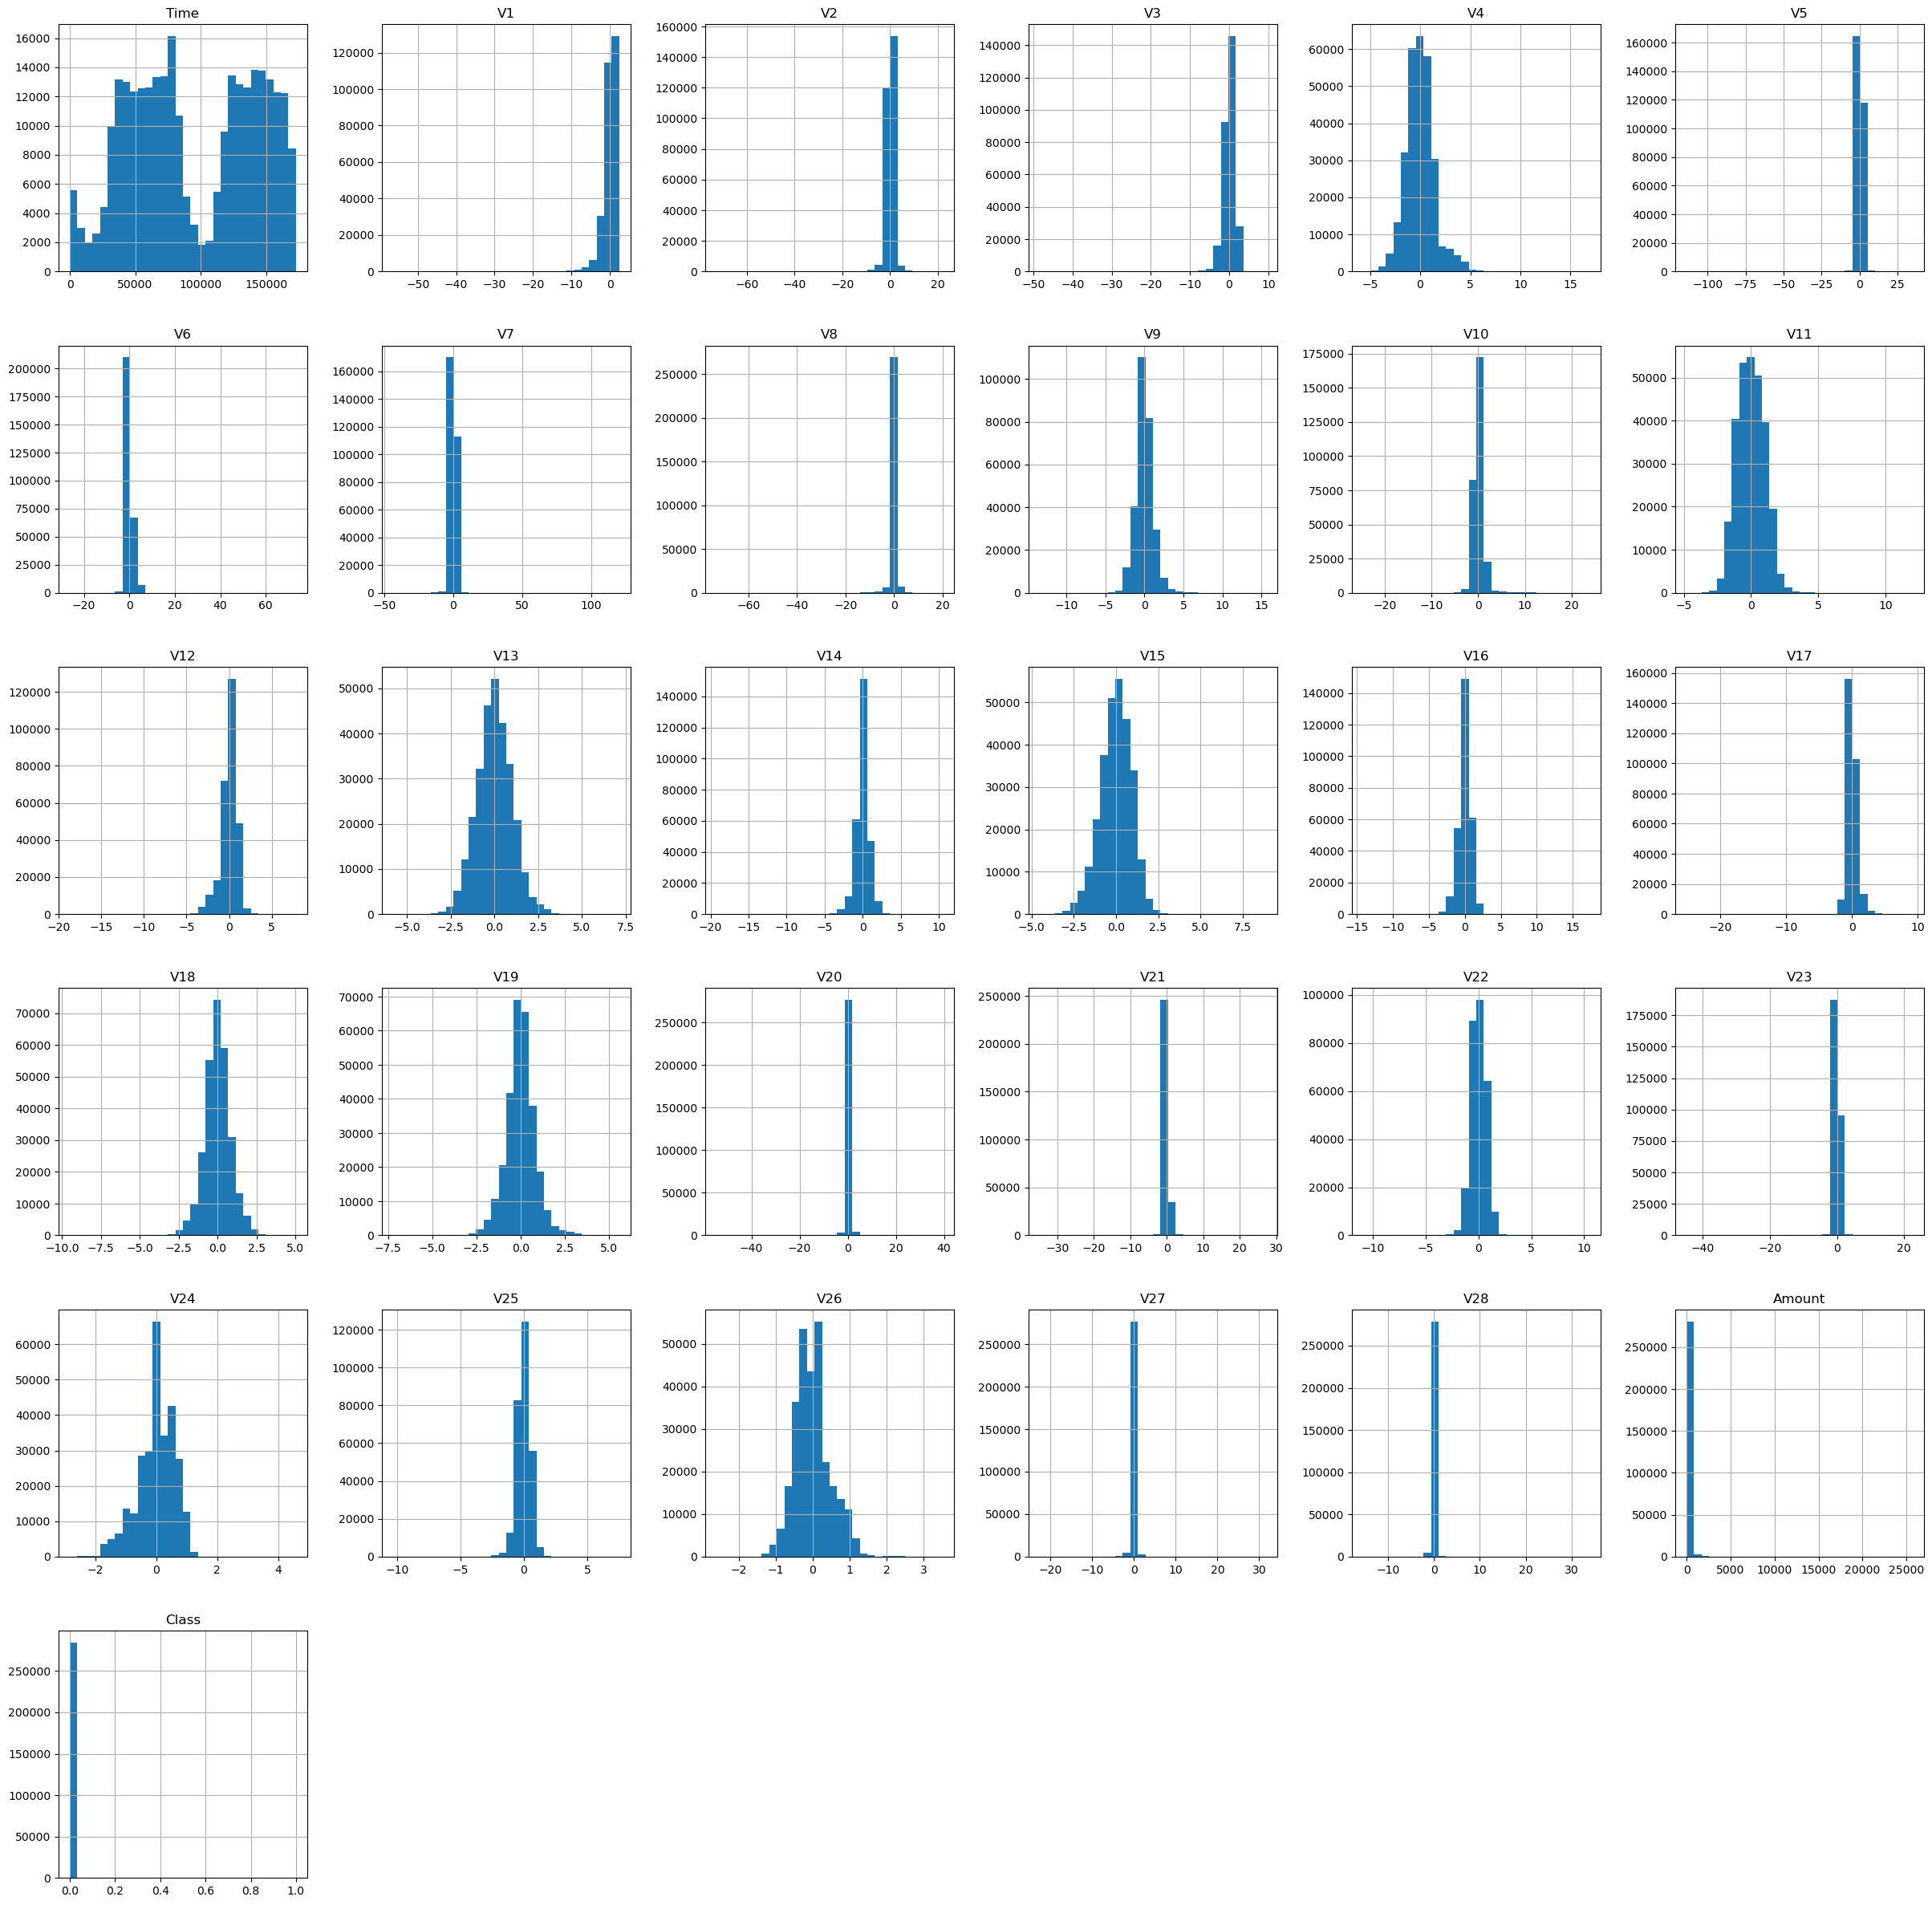

In [58]:
# Plot histogram of the data
df.hist(bins=30, figsize=(30, 30))
plt.show()

In [59]:
# Normalize the 'Amount' and 'Time' columns
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].values.reshape(-1, 1))
new_df['Time'] = (new_df['Time'] - new_df['Time'].min()) / (new_df['Time'].max() - new_df['Time'].min())

In [60]:
# Shuffle the dataset
new_df = new_df.sample(frac=1, random_state=1)

In [61]:
# Split the data into training, testing, and validation sets
train, test = train_test_split(new_df, test_size=0.1, random_state=1, stratify=new_df['Class'])
train, val = train_test_split(train, test_size=0.1, random_state=1, stratify=train['Class'])

In [62]:
# Separate features and target
x_train, y_train = train.drop(columns='Class'), train['Class']
x_test, y_test = test.drop(columns='Class'), test['Class']
x_val, y_val = val.drop(columns='Class'), val['Class']

print(f"Train shape: {x_train.shape}, {y_train.shape}")
print(f"Validation shape: {x_val.shape}, {y_val.shape}")
print(f"Test shape: {x_test.shape}, {y_test.shape}")

Train shape: (230693, 30), (230693,)
Validation shape: (25633, 30), (25633,)
Test shape: (28481, 30), (28481,)


In [63]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


In [65]:
# Train and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)
logistic_train_accuracy = logistic_model.score(x_train, y_train)
logistic_val_predictions = logistic_model.predict(x_val)
print(f"Logistic Regression Train Accuracy: {logistic_train_accuracy}")
print(classification_report(y_val, logistic_val_predictions, target_names=['Not Fraud', 'Fraud']))

Logistic Regression Train Accuracy: 0.9991980684286043
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25589
       Fraud       0.91      0.68      0.78        44

    accuracy                           1.00     25633
   macro avg       0.95      0.84      0.89     25633
weighted avg       1.00      1.00      1.00     25633



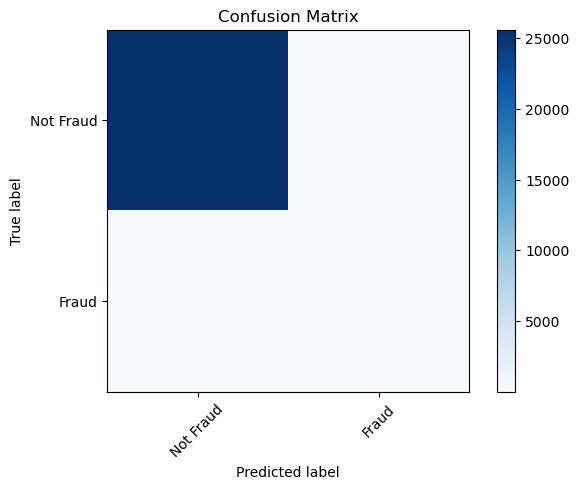

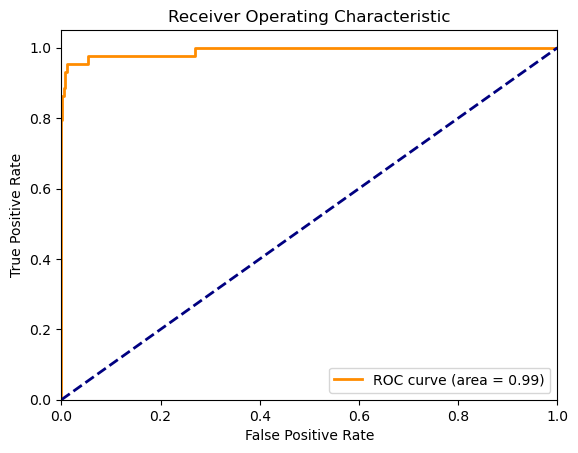

In [66]:
# Confusion matrix and ROC curve for Logistic Regression
cm = confusion_matrix(y_val, logistic_val_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val, logistic_model.predict_proba(x_val)[:, 1])
fpr, tpr, _ = roc_curve(y_val, logistic_model.predict_proba(x_val)[:, 1])
plot_roc_curve(fpr, tpr)

In [67]:
# Train and evaluate a shallow neural network
shallow_nn = Sequential()
shallow_nn.add(InputLayer(input_shape=(x_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True, monitor='val_loss', mode='min')
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn.summary()

shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=[checkpoint])
nn_val_predictions = (shallow_nn.predict(x_val).flatten() > 0.5).astype(int)
print(classification_report(y_val, nn_val_predictions, target_names=['Not Fraud', 'Fraud']))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

Epoch 1/5
7210/7210 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9143 - loss: 0.1779 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 2/5
7210/7210 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 3/5
7210/7210 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0049
Epoch 4/5
7210/7210 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 5/5
7210/7210 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0054
802/802 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25589
       Fraud       0.84      0.82      0.83        44

    accuracy                           1.00     25633
   macro avg       0.92      0.91      0.91     25633
weighted avg       1.00      1.00    

802/802 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
802/802 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


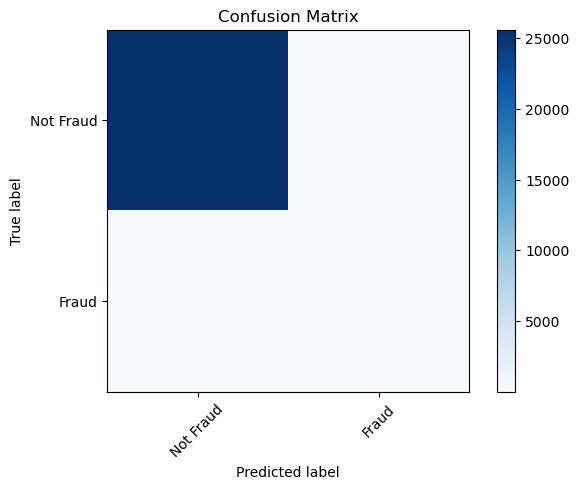

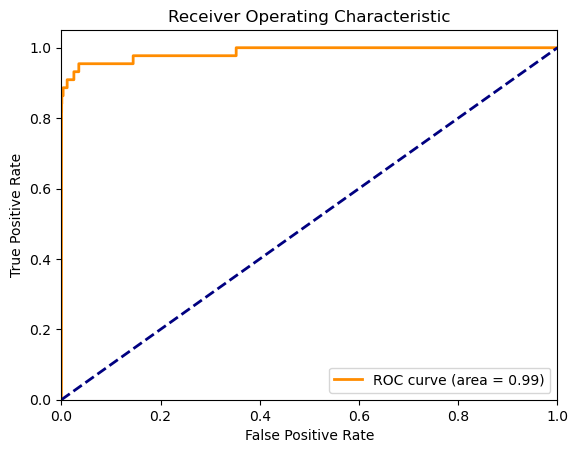

In [68]:
# Confusion matrix and ROC curve for Neural Network
cm = confusion_matrix(y_val, nn_val_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val, shallow_nn.predict(x_val).flatten())
fpr, tpr, _ = roc_curve(y_val, shallow_nn.predict(x_val).flatten())
plot_roc_curve(fpr, tpr)

In [69]:
# Train and evaluate RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=1)
rf.fit(x_train, y_train)
rf_val_predictions = rf.predict(x_val)
print(classification_report(y_val, rf_val_predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25589
       Fraud       0.89      0.57      0.69        44

    accuracy                           1.00     25633
   macro avg       0.95      0.78      0.85     25633
weighted avg       1.00      1.00      1.00     25633



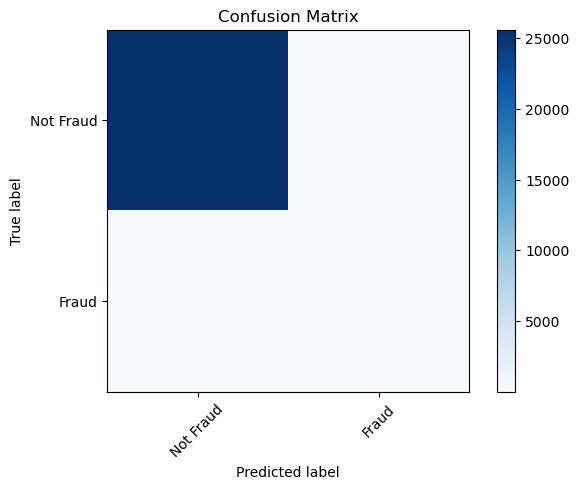

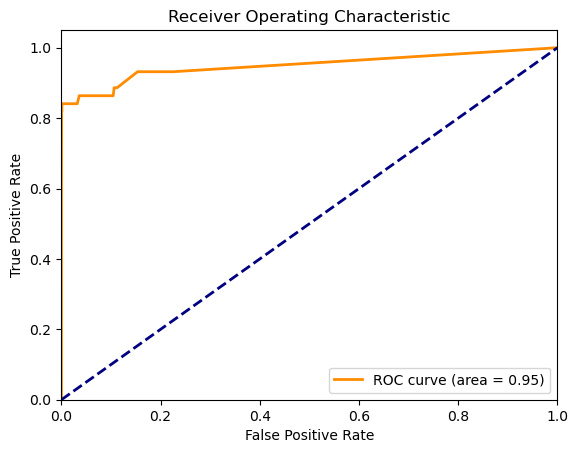

In [70]:
# Confusion matrix and ROC curve for RandomForest
cm = confusion_matrix(y_val, rf_val_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val, rf.predict_proba(x_val)[:, 1])
fpr, tpr, _ = roc_curve(y_val, rf.predict_proba(x_val)[:, 1])
plot_roc_curve(fpr, tpr)

In [71]:
# Train and evaluate GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=1)
gbc.fit(x_train, y_train)
gbc_val_predictions = gbc.predict(x_val)
print(classification_report(y_val, gbc_val_predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25589
       Fraud       0.76      0.70      0.73        44

    accuracy                           1.00     25633
   macro avg       0.88      0.85      0.86     25633
weighted avg       1.00      1.00      1.00     25633



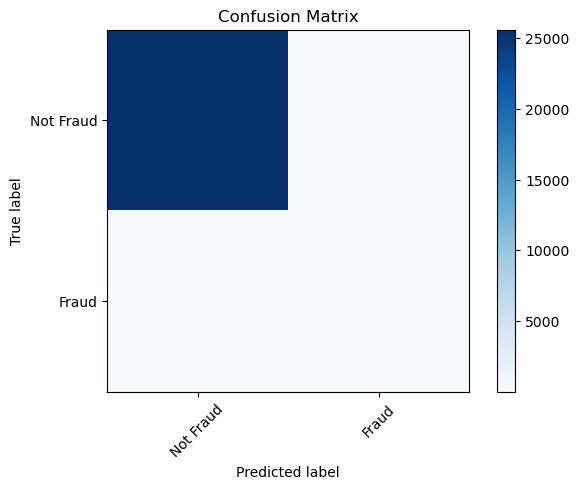

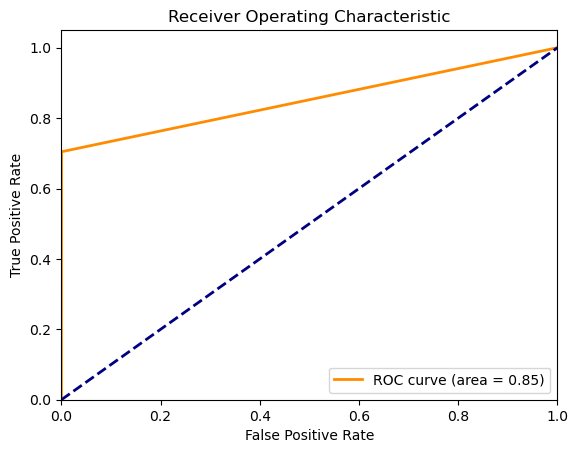

In [72]:
# Confusion matrix and ROC curve for GradientBoosting
cm = confusion_matrix(y_val, gbc_val_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val, gbc.predict_proba(x_val)[:, 1])
fpr, tpr, _ = roc_curve(y_val, gbc.predict_proba(x_val)[:, 1])
plot_roc_curve(fpr, tpr)

In [73]:
# Train and evaluate LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
svc_val_predictions = svc.predict(x_val)
print(classification_report(y_val, svc_val_predictions, target_names=['Not Fraud', 'Fraud']))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     25589
       Fraud       0.77      0.82      0.79        44

    accuracy                           1.00     25633
   macro avg       0.88      0.91      0.90     25633
weighted avg       1.00      1.00      1.00     25633



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


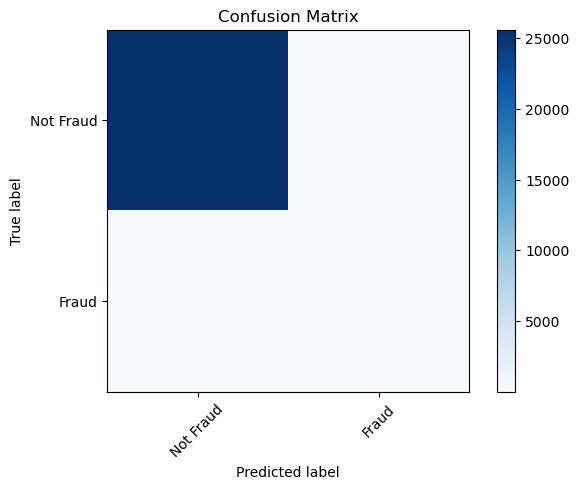

In [74]:
# Confusion matrix and ROC curve for LinearSVC
cm = confusion_matrix(y_val, svc_val_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
# ROC curve not applicable for LinearSVC as it does not provide probability estimates

In [75]:
# Addressing imbalance with under-sampling
not_frauds = new_df[new_df['Class'] == 0]
frauds = new_df[new_df['Class'] == 1]
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df = balanced_df.sample(frac=1, random_state=1)  # Shuffle

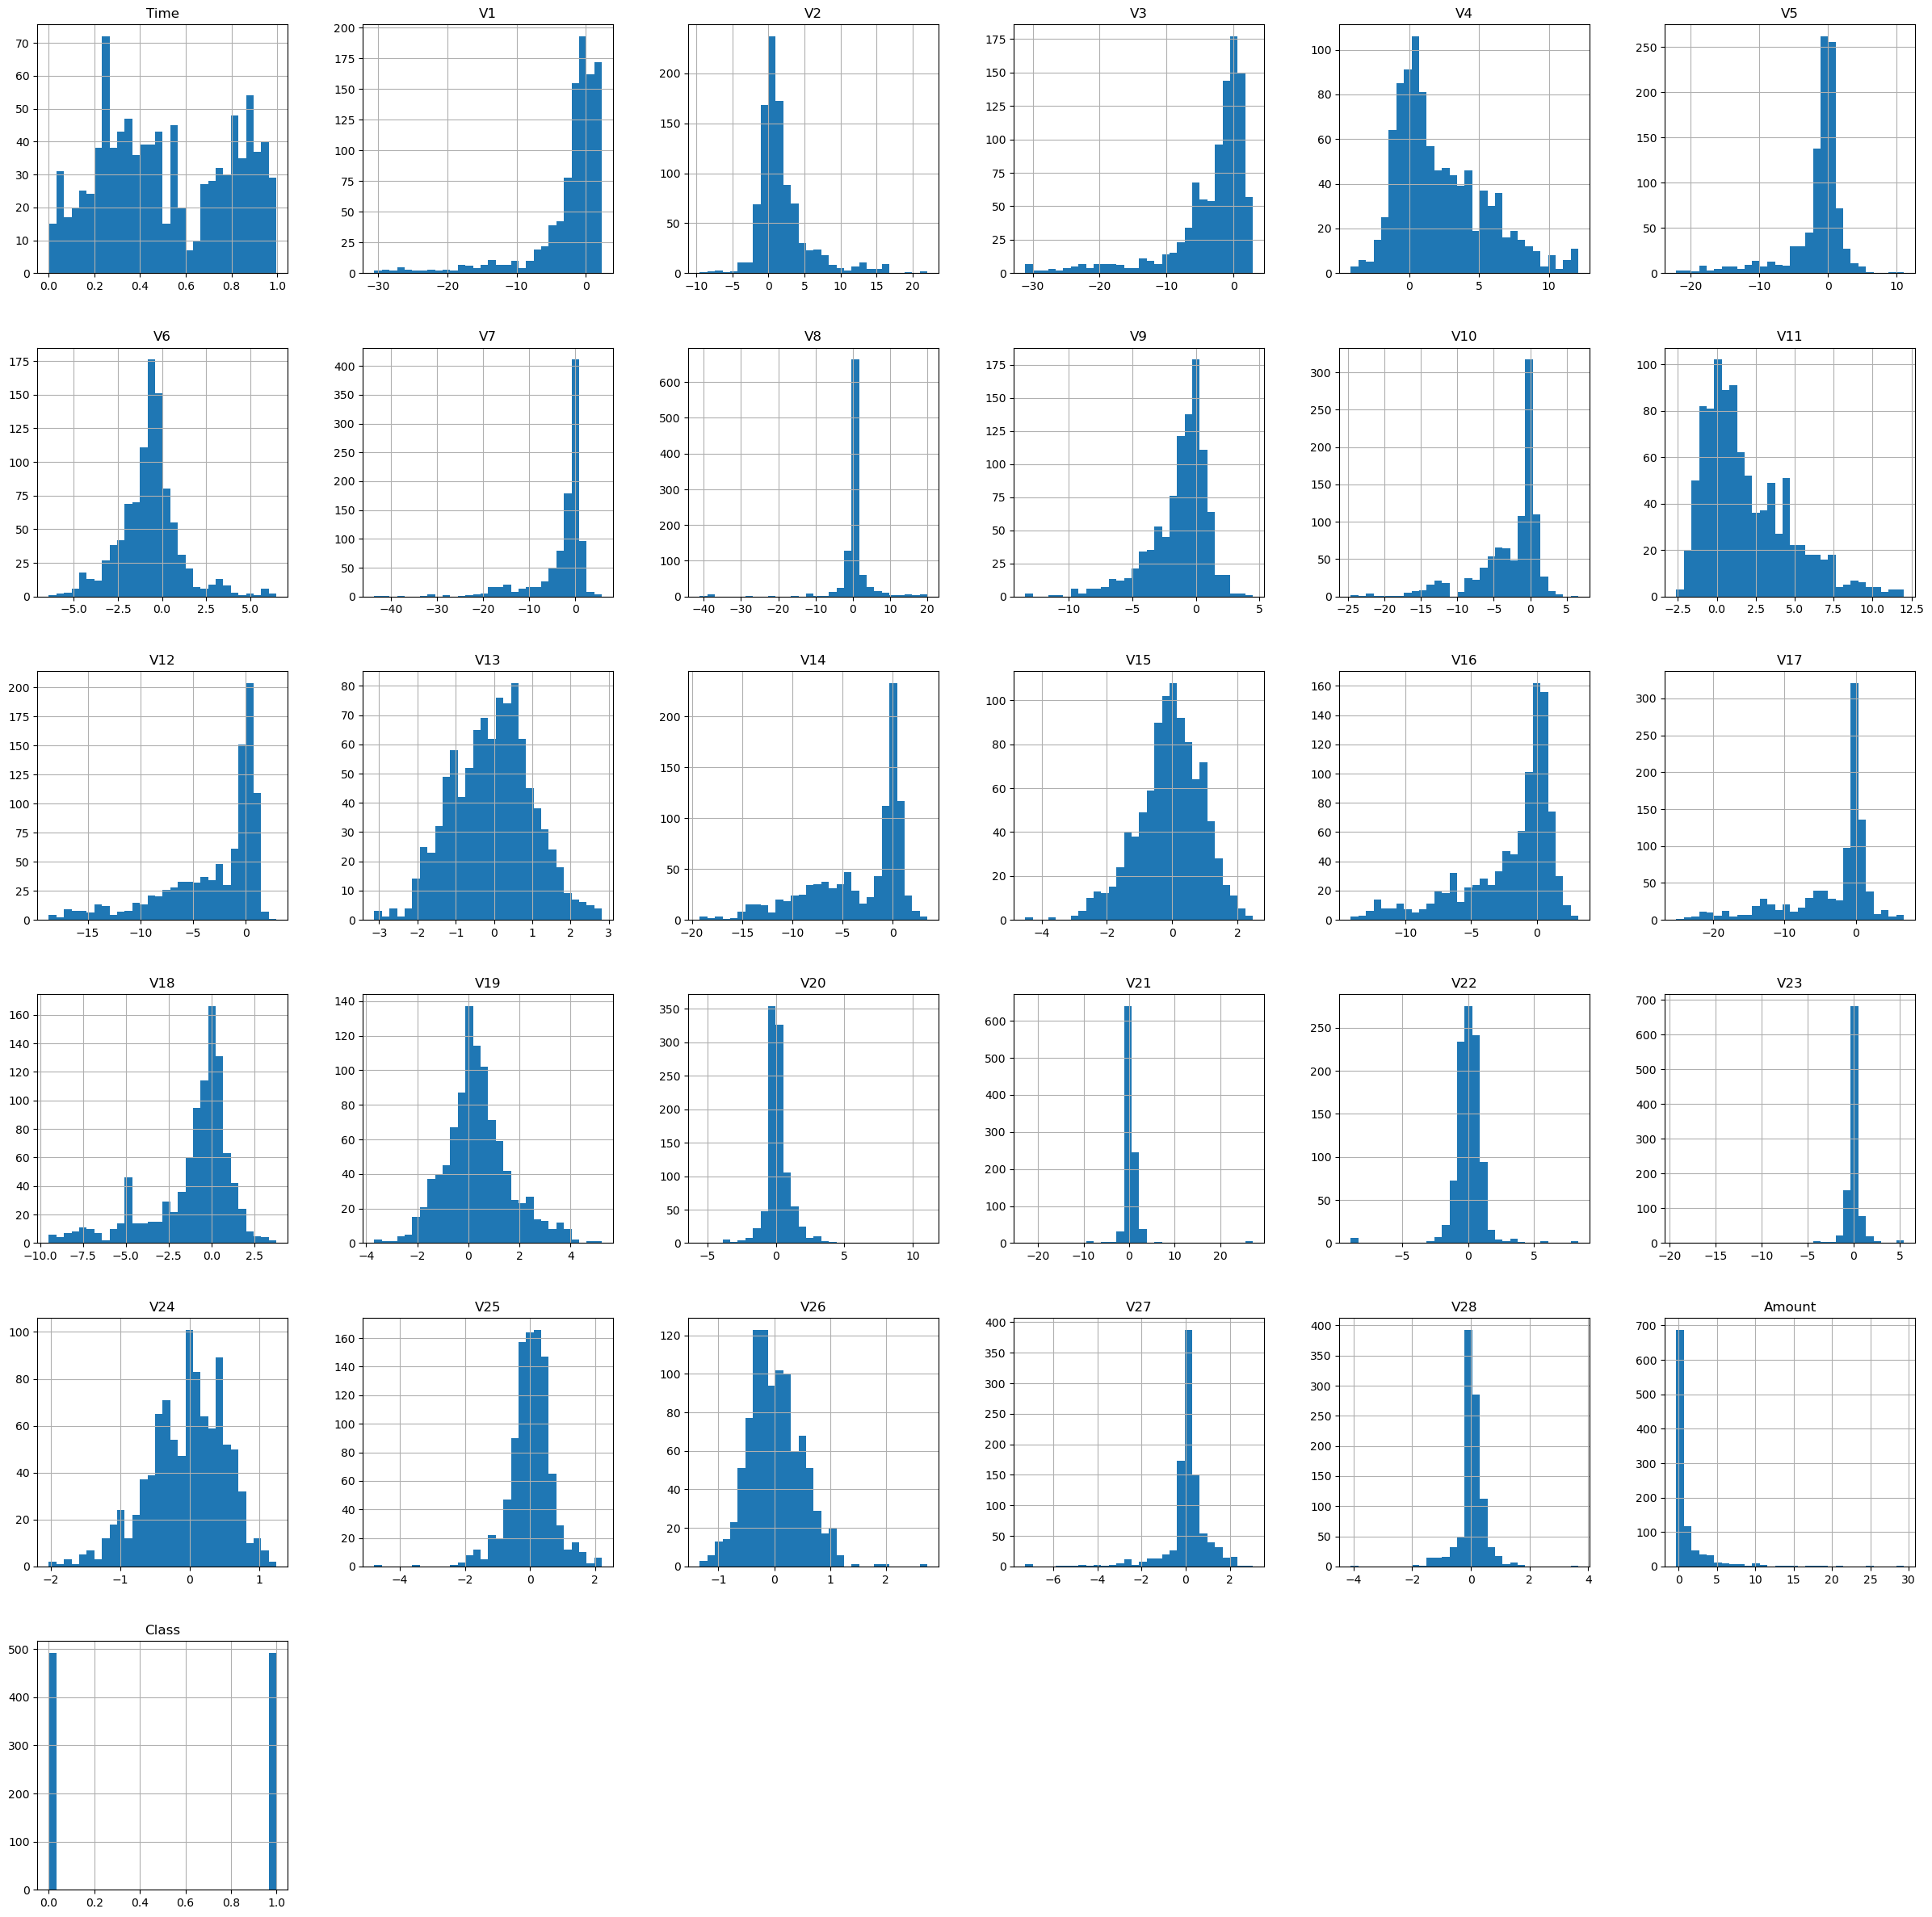

In [99]:
balanced_df.hist(bins=30, figsize=(30, 30))
plt.show()

In [76]:
# Split balanced dataset into training, validation, and test sets
train_bal, test_bal = train_test_split(balanced_df, test_size=0.1, random_state=1, stratify=balanced_df['Class'])
train_bal, val_bal = train_test_split(train_bal, test_size=0.1, random_state=1, stratify=train_bal['Class'])

x_train_bal, y_train_bal = train_bal.drop(columns='Class'), train_bal['Class']
x_test_bal, y_test_bal = test_bal.drop(columns='Class'), test_bal['Class']
x_val_bal, y_val_bal = val_bal.drop(columns='Class'), val_bal['Class']

print(f"Balanced Train shape: {x_train_bal.shape}, {y_train_bal.shape}")
print(f"Balanced Validation shape: {x_val_bal.shape}, {y_val_bal.shape}")
print(f"Balanced Test shape: {x_test_bal.shape}, {y_test_bal.shape}")


Balanced Train shape: (796, 30), (796,)
Balanced Validation shape: (89, 30), (89,)
Balanced Test shape: (99, 30), (99,)


In [77]:
# Train and evaluate Logistic Regression on balanced data
logistic_model_bal = LogisticRegression(max_iter=1000)
logistic_model_bal.fit(x_train_bal, y_train_bal)
logistic_val_bal_predictions = logistic_model_bal.predict(x_val_bal)
print(classification_report(y_val_bal, logistic_val_bal_predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      1.00      0.98        45
       Fraud       1.00      0.95      0.98        44

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



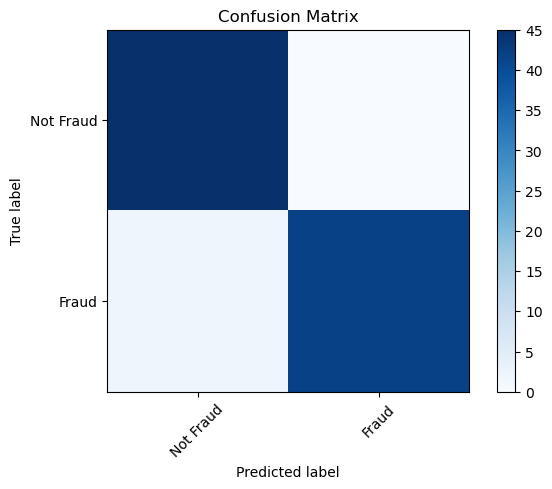

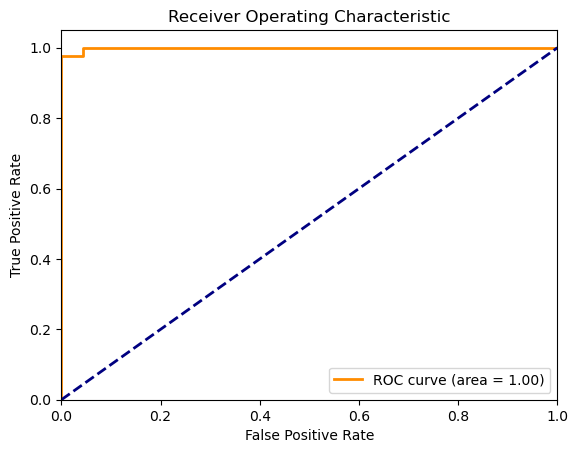

In [78]:
# Confusion matrix and ROC curve for Logistic Regression on balanced data
cm = confusion_matrix(y_val_bal, logistic_val_bal_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val_bal, logistic_model_bal.predict_proba(x_val_bal)[:, 1])
fpr, tpr, _ = roc_curve(y_val_bal, logistic_model_bal.predict_proba(x_val_bal)[:, 1])
plot_roc_curve(fpr, tpr)

In [79]:
# Train and evaluate a shallow neural network on balanced data
shallow_nn_bal = Sequential()
shallow_nn_bal.add(InputLayer(input_shape=(x_train_bal.shape[1],)))
shallow_nn_bal.add(Dense(2, activation='relu'))
shallow_nn_bal.add(BatchNormalization())
shallow_nn_bal.add(Dense(1, activation='sigmoid'))

checkpoint_bal = ModelCheckpoint('shallow_nn_bal.keras', save_best_only=True, monitor='val_loss', mode='min')
shallow_nn_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn_bal.fit(x_train_bal, y_train_bal, validation_data=(x_val_bal, y_val_bal), epochs=40, callbacks=[checkpoint_bal])
nn_val_bal_predictions = (shallow_nn_bal.predict(x_val_bal).flatten() > 0.5).astype(int)
print(classification_report(y_val_bal, nn_val_bal_predictions, target_names=['Not Fraud', 'Fraud']))

Epoch 1/40


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7556 - loss: 0.5653 - val_accuracy: 0.7978 - val_loss: 0.4917
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7835 - loss: 0.5299 - val_accuracy: 0.9101 - val_loss: 0.4630
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8023 - loss: 0.5026 - val_accuracy: 0.9438 - val_loss: 0.4396
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8342 - loss: 0.4788 - val_accuracy: 0.9326 - val_loss: 0.4215
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8419 - loss: 0.4480 - val_accuracy: 0.9326 - val_loss: 0.4069
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8452 - loss: 0.4428 - val_accuracy: 0.9326 - val_loss: 0.3911
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8957 - loss: 0.3976 - val_accuracy: 0.9326 - val_loss: 0.3774
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8693 - loss: 0.3999 - val_accuracy: 0.9326 - val_loss: 0.3645
Ep

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


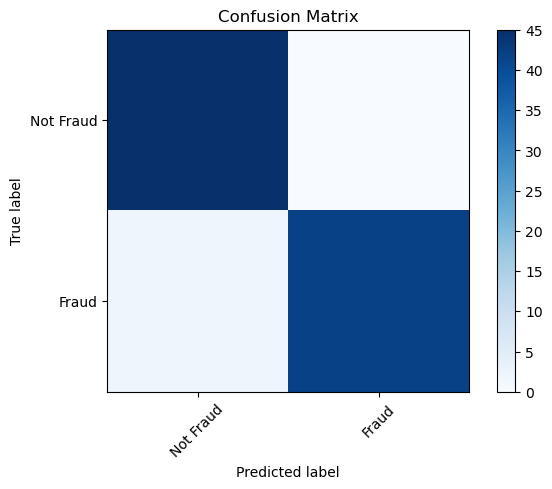

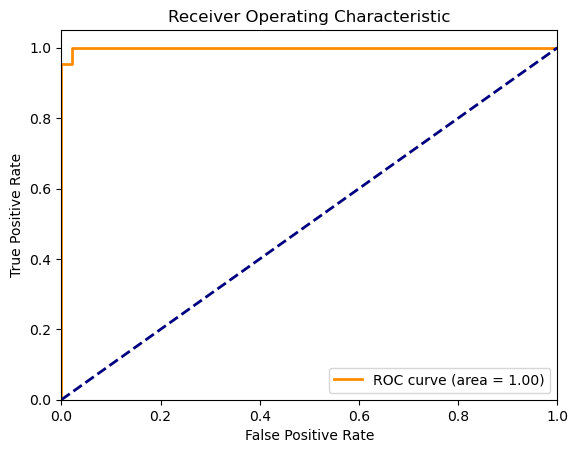

In [80]:
# Confusion matrix and ROC curve for Neural Network on balanced data
cm = confusion_matrix(y_val_bal, nn_val_bal_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val_bal, shallow_nn_bal.predict(x_val_bal).flatten())
fpr, tpr, _ = roc_curve(y_val_bal, shallow_nn_bal.predict(x_val_bal).flatten())
plot_roc_curve(fpr, tpr)

In [81]:
# Train and evaluate RandomForestClassifier on balanced data
rf_bal = RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=1)
rf_bal.fit(x_train_bal, y_train_bal)
rf_val_bal_predictions = rf_bal.predict(x_val_bal)
print(classification_report(y_val_bal, rf_val_bal_predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      1.00      0.95        45
       Fraud       1.00      0.89      0.94        44

    accuracy                           0.94        89
   macro avg       0.95      0.94      0.94        89
weighted avg       0.95      0.94      0.94        89



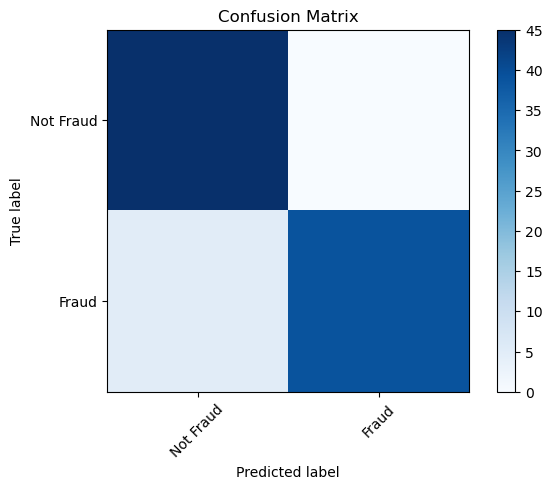

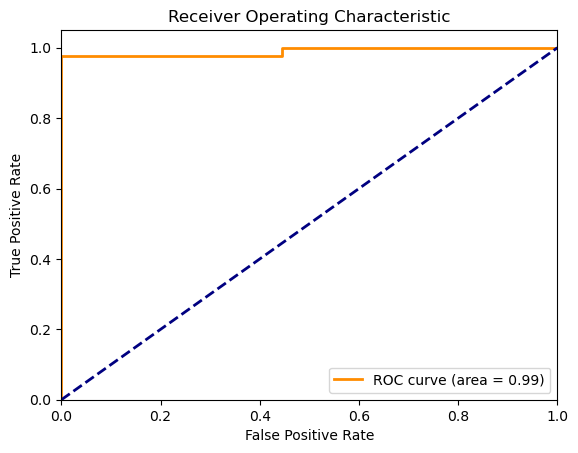

In [82]:
# Confusion matrix and ROC curve for RandomForest on balanced data
cm = confusion_matrix(y_val_bal, rf_val_bal_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val_bal, rf_bal.predict_proba(x_val_bal)[:, 1])
fpr, tpr, _ = roc_curve(y_val_bal, rf_bal.predict_proba(x_val_bal)[:, 1])
plot_roc_curve(fpr, tpr)

In [83]:
# Train and evaluate GradientBoostingClassifier on balanced data
gbc_bal = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=1)
gbc_bal.fit(x_train_bal, y_train_bal)
gbc_val_bal_predictions = gbc_bal.predict(x_val_bal)
print(classification_report(y_val_bal, gbc_val_bal_predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.96      0.96        45
       Fraud       0.95      0.95      0.95        44

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



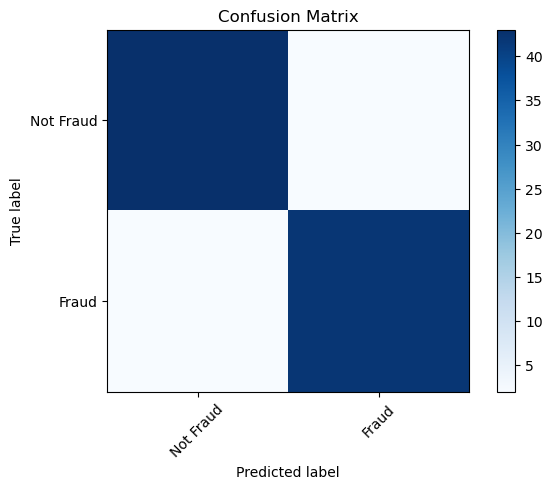

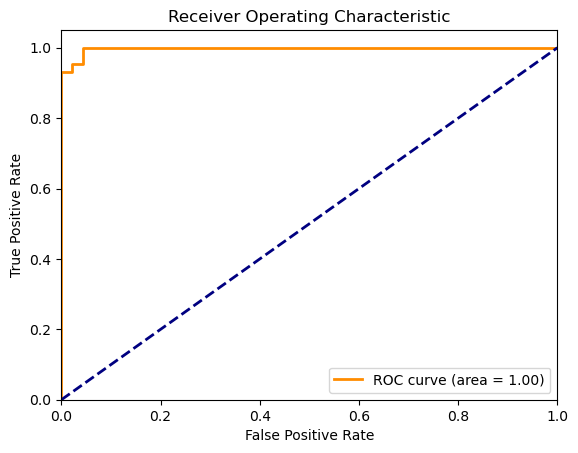

In [84]:
# Confusion matrix and ROC curve for GradientBoosting on balanced data
cm = confusion_matrix(y_val_bal, gbc_val_bal_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val_bal, gbc_bal.predict_proba(x_val_bal)[:, 1])
fpr, tpr, _ = roc_curve(y_val_bal, gbc_bal.predict_proba(x_val_bal)[:, 1])
plot_roc_curve(fpr, tpr)

In [85]:
# Train and evaluate LinearSVC on balanced data
svc_bal = LinearSVC(class_weight='balanced', max_iter=10000)
svc_bal.fit(x_train_bal, y_train_bal)
svc_val_bal_predictions = svc_bal.predict(x_val_bal)
print(classification_report(y_val_bal, svc_val_bal_predictions, target_names=['Not Fraud', 'Fraud']))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       0.96      1.00      0.98        45
       Fraud       1.00      0.95      0.98        44

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


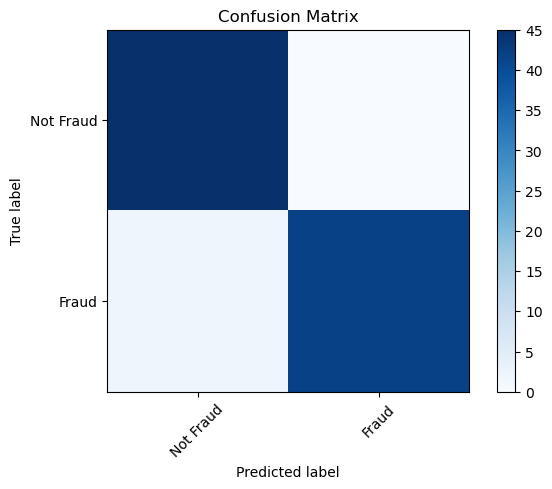

In [86]:
# Confusion matrix and ROC curve for LinearSVC on balanced data
cm = confusion_matrix(y_val_bal, svc_val_bal_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])

In [88]:
# Hyperparameter tuning with RandomizedSearchCV for RandomForestClassifier
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=1),
    param_distributions=param_dist_rf,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    random_state=1
)

random_search_rf.fit(x_train_bal, y_train_bal)

# Get the best estimator and its hyperparameters
best_rf_random = random_search_rf.best_estimator_
print(f"Best RandomForest parameters (random search): {random_search_rf.best_params_}")

# Evaluate the best model on the validation set
rf_val_bal_predictions_random = best_rf_random.predict(x_val_bal)
print(classification_report(y_val_bal, rf_val_bal_predictions_random, target_names=['Not Fraud', 'Fraud']))

Best RandomForest parameters (random search): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 107}
              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97        45
       Fraud       1.00      0.93      0.96        44

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



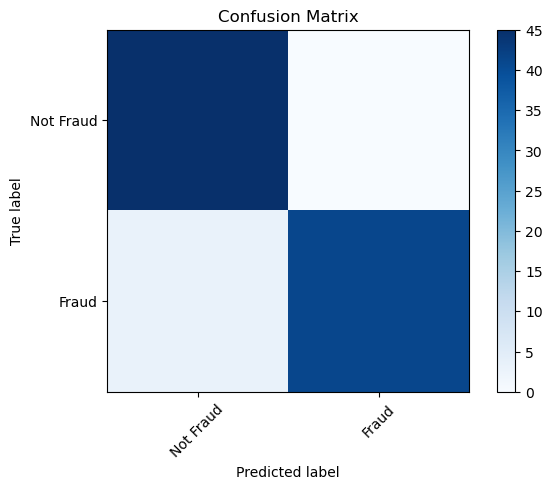

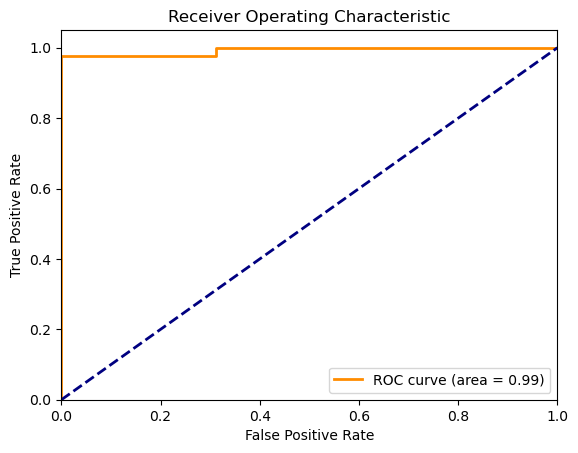

In [89]:
# Confusion matrix and ROC curve for tuned RandomForest
cm = confusion_matrix(y_val_bal, rf_val_bal_predictions_random)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_val_bal, best_rf_random.predict_proba(x_val_bal)[:, 1])
fpr, tpr, _ = roc_curve(y_val_bal, best_rf_random.predict_proba(x_val_bal)[:, 1])
plot_roc_curve(fpr, tpr)

In [90]:
# Feature importance for RandomForest
feature_importances = best_rf_random.feature_importances_
feature_names = x_train.columns
sorted_idx = np.argsort(feature_importances)

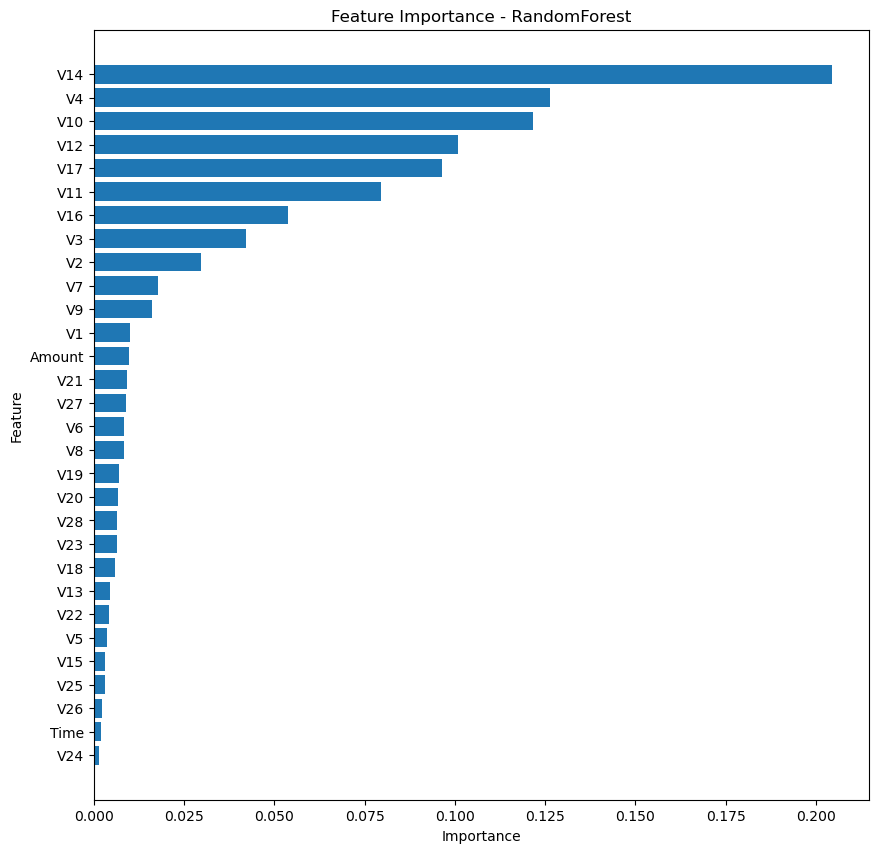

In [91]:
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title('Feature Importance - RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [96]:
#Steps to Model Deployment
# Save the best model (Logistic Regression with balanced data)
joblib.dump(logistic_model_bal, 'logistic_model_bal.pkl')

# Load the model (for deployment or further use)
loaded_model = joblib.load('logistic_model_bal.pkl')

# Make predictions with the loaded model
test_predictions = loaded_model.predict(x_test_bal)
print(classification_report(y_test_bal, test_predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.96      0.94        49
       Fraud       0.96      0.92      0.94        50

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



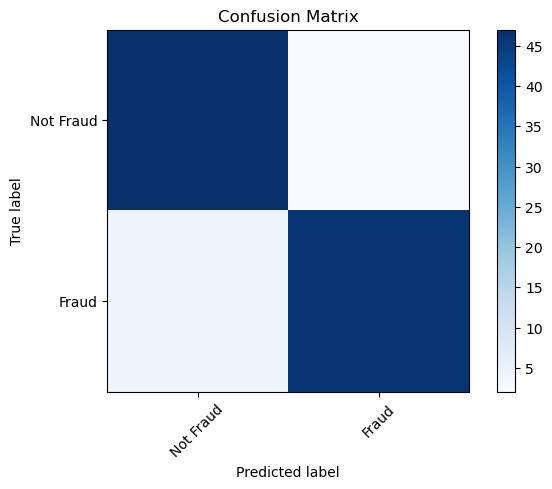

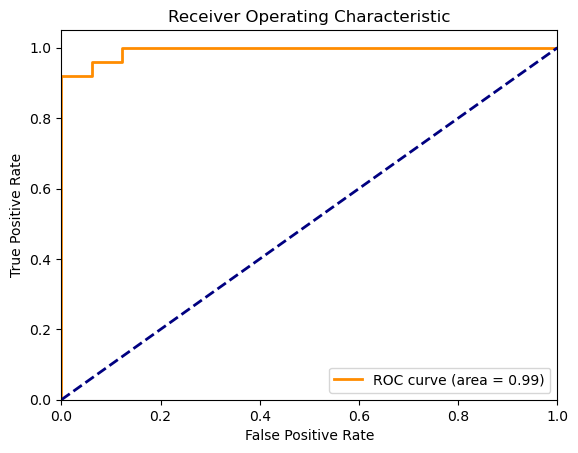

In [98]:
# Confusion matrix and ROC curve for Logistic Regression on test data
cm = confusion_matrix(y_test_bal, test_predictions)
plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'])
roc_auc = roc_auc_score(y_test_bal, loaded_model.predict_proba(x_test_bal)[:, 1])
fpr, tpr, _ = roc_curve(y_test_bal, loaded_model.predict_proba(x_test_bal)[:, 1])
plot_roc_curve(fpr, tpr)